In [1]:
import cv2 # for capturing video using camera

In [2]:
import os # for using directory navigations

In [3]:
import face_recognition as fr # used for face recognition modules

In [4]:
import numpy as npy #used for organising the data in arrays

In [5]:
import matplotlib.pyplot as plt # for displaying the data collected using camera

In [6]:
#this xml file was taken from # https://github.com/kipr/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

In [7]:
traindata = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [8]:
# user-defined function to apply the image resizing on the frames that are captured

def filteredloop(loop_data,tempdata):
    for x,y,w,h in loop_data:# x,y cordinates and width and height of the image
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,255), 4) # to display rectangle over the identified image that takes x,y cordinates and width and height as parameters
        updated_frame = frame[y:y+h, x:x+w, :]# rows and columns of the face detected in the frame
        updated_frame = cv2.resize(updated_frame, (50,50))#resizing all the identified faces in the frame to standard 50*50 size
        print(len(tempdata))
        if len(tempdata) < 200:#loop for capturing 200 frames and storing them
             tempdata.append(updated_frame)
    
    

In [9]:
without_mask_data = [] # to store the data of the images without having mask
capture = cv2.VideoCapture(0)#to turn on the camera module
while True:
    #isflagTrue contains true or false. read() returns true to this variable if the camera module is working fine
    
    isflagTrue , frame = capture.read()#to input the frames from the camera module
    if(isflagTrue):
        currentframe = traindata.detectMultiScale(frame)#perfroms sliding window operation and detects the haar features in every window. This line detects the faces in the current image frame
        filteredloop(currentframe,without_mask_data)
        cv2.imshow('result',frame)
        # ascii value of letter "q" is 2. if user clicks "q", the loop will be terminated
        if cv2.waitKey(2) == 113 or len(without_mask_data) >= 200:
            break
    
capture.release()# release the camera module
cv2.destroyAllWindows() # to close the popup camera window



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [10]:
npy.save('nomask.npy',without_mask_data)# saving the results in a file

In [11]:
#Module to capture data with mask

mask_data = [] # to store the data of the images having mask
capture = cv2.VideoCapture(0) #to turn on the camera module
while True:
    isflagTrue , frame = capture.read() #isflagTrue contains true or false. read() returns true to this variable if the camera module is working fine
    if(isflagTrue):
        currentframe = traindata.detectMultiScale(frame)
        filteredloop(currentframe,mask_data)
        cv2.imshow('result',frame)
        if cv2.waitKey(2) == 113 or len(mask_data) >= 200:#the loop terminates when user clicks "q" or when it completes taking 200 pics
            break
    
capture.release()
cv2.destroyAllWindows()



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
200


In [12]:
npy.save('mask.npy',mask_data)#saving the details in a file

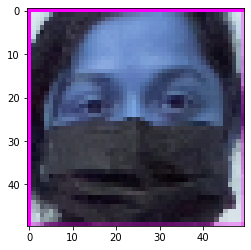

In [13]:
plt.imshow(mask_data[116]) # to show a random file in the data captured

In [14]:
#loading the data from the files
mask = npy.load('mask.npy')
nomask = npy.load('nomask.npy')

In [15]:
#function to convert the data in the files into 2D images
def reshape(data):
    return data.reshape(200,50 * 50 *3)

In [16]:
#converting the data using the user-defined function
mask = reshape(mask)
nomask = reshape(nomask)

In [17]:
#joining the data together to a single dataset using concatination
combined_data = npy.r_[mask, nomask]

In [18]:
#assigning the first 200 dataset values in the combined dataset to 0 and the rest 200 values to 1
indexes = npy.zeros(combined_data.shape[0])
indexes[200:] = 1.0

In [19]:
#https://scikit-learn.org/stable/
#https://scikit-learn.org/stable/modules/svm.html

In [20]:
from sklearn.svm import SVC #to load the linear support vector classifier from sklearn
from sklearn.metrics import accuracy_score

In [21]:
from sklearn.model_selection import train_test_split # predefined function to split the data into training and testing data

In [22]:
x1, x2, y1, y2 = train_test_split(combined_data,indexes, test_size=0.25)#To prevent overfitting

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=3) #principal component analysis to reduce the linear dimensity  


In [25]:
x1 = pca.fit_transform(x1)

In [26]:
x1, x2, y1, y2 = train_test_split(combined_data,indexes, test_size=0.25)

In [27]:
svm = SVC()
svm.fit(x1, y1)

SVC()

In [28]:
predictedvalue = svm.predict(x2)

In [29]:
accuracy_score(y2, predictedvalue) #getting the accuracy over the test data

0.98

In [30]:
#to display the values Mask and No mask on the rectangle over the image
values = {0 : 'Mask', 1 : 'No Mask'}
f_style = cv2.FONT_HERSHEY_COMPLEX

In [31]:
# user-defined function to resize the images to standard 50*50
def adjustframe(frame):
    adjustedframe = frame[y:y+h, x:x+w, :]
    adjustedframe = cv2.resize(adjustedframe, (50,50))
    adjustedframe = adjustedframe.reshape(1,-1)
    return svm.predict(adjustedframe)[0]

In [32]:
#user defined function for loading images from designated Directory
images = []#array for storing the images
classNames = []#array for storing the names of the images
myList = os.listdir("ai_testimages")#loading the names of the images
myList.remove(".ipynb_checkpoints")#removing the temp file that was created by default by Jupyter Notebook
print(myList)
#loading the images from the designated directory to the images array
for cl in myList:
    curImg = cv2.imread(f'{"ai_testimages"}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])#saving the names of the image files
print(classNames)

['Srikanth.jpeg', 'Teja.jpeg', 'Chaitanya.jpeg', 'panindra.jpeg']
['Srikanth', 'Teja', 'Chaitanya', 'panindra']


In [33]:
#encoding the images from the designated path
f_encode = []
img_encoding = []
for i in myList:
    Img = fr.load_image_file(f'{"ai_testimages"}/{i}')
    img_encoding.append(fr.face_encodings(Img)[0])
print(img_encoding)


[array([-6.24881834e-02,  1.74834639e-01,  1.56802274e-02, -8.52438360e-02,
       -8.37094784e-02, -6.87641650e-03, -3.20441201e-02, -5.83937205e-02,
        2.19755217e-01, -1.57549195e-02,  1.47176430e-01,  4.96921353e-02,
       -1.93680108e-01, -1.67004600e-01, -1.54821649e-02,  9.30671245e-02,
       -7.97276795e-02, -2.00294405e-01, -1.40947834e-01, -3.05976942e-02,
       -7.80753791e-04,  6.84747323e-02,  5.69769368e-02,  1.81630254e-04,
       -7.52403140e-02, -4.66489136e-01, -2.19741911e-02, -1.20839171e-01,
       -1.80167221e-02, -1.56123534e-01,  2.86995992e-03,  2.98262537e-02,
       -1.99424505e-01, -8.17771405e-02, -4.64525819e-03,  1.03193969e-01,
        1.34148151e-02,  2.11444125e-02,  1.51627064e-01,  6.81254119e-02,
       -2.35957563e-01,  3.79288644e-02,  3.41818407e-02,  2.94685900e-01,
        1.92225069e-01,  5.24377935e-02,  7.52659887e-03, -2.86850333e-03,
        1.05444819e-01, -2.12130278e-01,  1.33254826e-01,  1.05913997e-01,
        1.40173078e-01, 

In [34]:
#variable initialisation 
f_loc = []
f_encode = []
f_names = []
p_frame = True

In [35]:
# user defined function for encoding the images from the designated directory
def encode(f_encode):
    for i in f_encode:
            # See if the face is a match for the known face(s)
        matches = fr.compare_faces(img_encoding, i)
        name = "Unknown"

        face_distances = fr.face_distance(img_encoding, i)
        best_match_index = npy.argmin(face_distances)
        if matches[best_match_index]:
            name = classNames[best_match_index]

        f_names.append(name)

In [36]:
#user defined function to display the result
def result(cresult):
     for (t, r, b, l), name in cresult:
        # Scale back up face locations since the frame we detected in was scaled to 1/4 size
        t *= 4
        r *= 4
        b *= 4
        l *= 4

        # Draw a box around the face
        cv2.rectangle(frame, (l, t), (r, b), (0, 0, 255), 2)

        # Draw a label with a name below the face
        cv2.rectangle(frame, (l, b - 35), (r, b), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_COMPLEX
        cv2.putText(frame, name, (l + 6, b - 6), font, 1.0, (255, 255, 255), 1)
        cv2.putText(frame, result1, (l + 6, t - 6), font, 1.0, (255, 255, 255), 1)


In [37]:
#module to start the live detection
traindata = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
capture = cv2.VideoCapture(0) #for capturing the video frame
video_capture = cv2.VideoCapture(0)
data = []
result1 =""
cresult =""
while(1):
    isFlagTrue, frame = capture.read()
    if(isFlagTrue):
        currentframe = traindata.detectMultiScale(frame)
        for x,y,w,h in currentframe:
            cv2.rectangle(frame, (x,y), (x+w, y+h), (255,0,255), 4)# to display rectangle over the identified image that takes x,y cordinates and width and height as parameters
            result1 = values[int(adjustframe(frame))]# converting the 
            #cv2.putText(frame, result, (x,y), f_style, 1, (244,250,250), 2) #to show the results over the rectangle "Mask", "No Mask"
            print(result1) # to print the result
        # Removed as a part of phase 2
        #cv2.imshow('result',frame)
        #result1=result
        #if cv2.waitKey(33) & 0xFF == ord('q'):## to terminate the loop when the user clicks "q"
         #   break

 
    #phase II:
    ret, frame = video_capture.read() #to capture a frame

    # Resizing the image 
    s_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
    
    # Converting the video frame to standard input image used by face recognition
    r_frame = s_frame[:, :, ::-1]

    # Only process every other frame of video to save time
    
    if p_frame:
        # Find all the faces and face encodings in the current frame of video
        f_loc = fr.face_locations(r_frame)
        f_encode = fr.face_encodings(r_frame, f_loc)
        f_names = []
        encode(f_encode)     
    p_frame = not p_frame
    # Display the results
    cresult = zip(f_loc, f_names)
    
    result(cresult)
    # Display the resulting image
    cv2.imshow('Video',frame)
    #cv2.imshow('result1',frame)

    # Hit 'q' on the keyboard to quit!
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
capture.release()
cv2.destroyAllWindows()





No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
No Mask
Mask
Mask
Mask
No Mask
Mask
No Mask
No Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
Mask
No Mask
N

KeyboardInterrupt: 